In [4]:
import os
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
from PIL import Image

import numpy as np
from sklearn.metrics import precision_recall_curve, roc_curve, auc, f1_score

from pneumonia.model.base import load_keras_model, load_keras_model_from_task_dir
from pneumonia.model.vgg16 import VGG16
from pneumonia.model.vgg19 import VGG19
from pneumonia.model.densenet121 import DENSENET121
from pneumonia.evaluation.keras import evaluate_keras_model, pred_probas
from pneumonia.evaluation.commons import calculate_scores
from pneumonia.plot import plot_confusion_matrix, plot_precision_recall_curve, plot_roc_curve

from keras import backend as K

from tqdm import tqdm

%matplotlib inline

/home/fernandocamargo/anaconda3/envs/chest-xray-pneumonia/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/home/fernandocamargo/anaconda3/envs/chest-xray-pneumonia/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/home/fernandocamargo/anaconda3/envs/chest-xray-pneumonia/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/home/fernandocamargo/anaconda3/envs/chest-xray-pneumonia/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/home/fernandocamargo/anaconda3/envs/chest-xray-pneumonia/lib/python3.6/site-packages/traitlet

In [5]:
#model = load_keras_model(VGG16, "VGG16_relu_2x512_0.00001_10_0.9733")
model = load_keras_model_from_task_dir(DENSENET121, "trained_models/DENSENET121_relu_2x512_0.0001_0.9707_augmented")

In [6]:
model.param_kwargs

{'val_size': 0.2,
 'invert_train_val': False,
 'prior_augmentation': True,
 'batch_size': 15,
 'val_batch_size': 100,
 'sampling_strategy': 'oversample',
 'interpolation': 'lanczos',
 'keep_aspect_ratio': False,
 'keep_resized_for_training': False,
 'generator_workers': 8,
 'generator_max_queue_size': 20,
 'data_augmented': True,
 'data_augmentation_params': <FrozenOrderedDict OrderedDict([('_FrozenOrderedDict__dict', <FrozenOrderedDict OrderedDict()>), ('_FrozenOrderedDict__hash', None)])>,
 'data_augmentation_width_resize_range': 0.0,
 'trainable_head_layers': 0,
 'train_head': False,
 'early_stopping_patience': 5,
 'epochs': 25,
 'number_of_trainings': 1,
 'input_shape': (224, 224),
 'frozen_layers': 0,
 'optimizer': 'adam',
 'dropout': 0.3,
 'momentum': 0.8,
 'activation_func': 'relu',
 'final_activation': 'sigmoid',
 'dense_neurons': 512,
 'learning_rate': 0.0001,
 'pooling_strategy': 'avg',
 'has_dropout_between_dense': True}

In [7]:
test_generator = model.get_test_generator()
test_trues = test_generator.classes
test_probas = pred_probas(model.keras_model, test_generator)

Found 624 images belonging to 2 classes.


InternalError: Dst tensor is not initialized.
	 [[Node: _arg_densenet121_input_0_1/_8029 = _Recv[client_terminated=false, recv_device="/job:localhost/replica:0/task:0/device:GPU:0", send_device="/job:localhost/replica:0/task:0/device:CPU:0", send_device_incarnation=1, tensor_name="edge_6489__arg_densenet121_input_0_1", tensor_type=DT_FLOAT, _device="/job:localhost/replica:0/task:0/device:GPU:0"]()]]
	 [[Node: dense_3/Sigmoid/_8031 = _Recv[client_terminated=false, recv_device="/job:localhost/replica:0/task:0/device:CPU:0", send_device="/job:localhost/replica:0/task:0/device:GPU:0", send_device_incarnation=1, tensor_name="edge_6490_dense_3/Sigmoid", tensor_type=DT_FLOAT, _device="/job:localhost/replica:0/task:0/device:CPU:0"]()]]

In [ ]:
best_f1 = 0.0
for t in tqdm(np.arange(0.0, 1.0, 0.00001)):
    f1 = f1_score(test_trues, (test_probas > t).astype(int))
    if f1 > best_f1:
        best_f1 = f1
        threshold = t

In [ ]:
threshold

In [ ]:
#threshold=0.99774

test_preds = (test_probas > threshold).astype(int)
acc, precision, recall, f1, confusion_matrix = calculate_scores(test_trues, test_preds)
print(f"acc: {acc}")
print(f"precision: {precision}")
print(f"recall: {recall}")
print(f"f1 score: {f1}")
plot_confusion_matrix(confusion_matrix, ["NORMAL", "PNEUMONIA"]).show()


p, r, thresholds = precision_recall_curve(test_trues, test_preds)
plot_precision_recall_curve(p, r).show()

fpr, tpr, thresholds = roc_curve(test_trues, test_preds)
roc_auc = auc(fpr, tpr)
plot_roc_curve(fpr, tpr, roc_auc).show()

NORMAL/IM-0073-0001_resized.jpeg
0.999957799911499


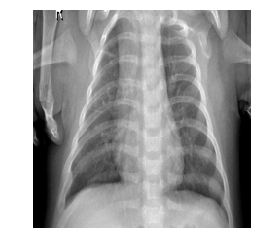

NORMAL/NORMAL2-IM-0195-0001_resized.jpeg
0.9913399815559387


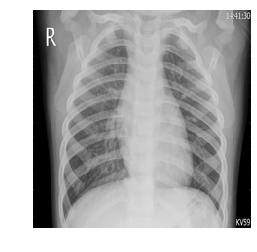

NORMAL/NORMAL2-IM-0198-0001_resized.jpeg
0.9999349117279053


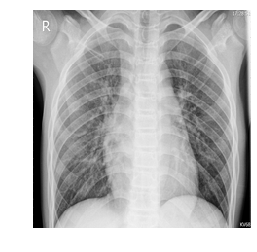

NORMAL/NORMAL2-IM-0201-0001_resized.jpeg
0.9999047517776489


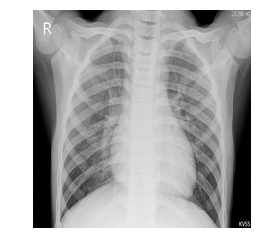

NORMAL/NORMAL2-IM-0206-0001_resized.jpeg
0.9997989535331726


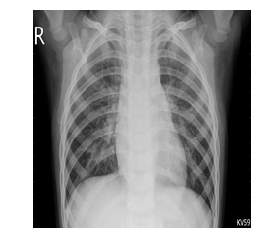

NORMAL/NORMAL2-IM-0210-0001_resized.jpeg
0.9999940395355225


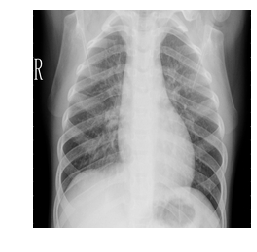

NORMAL/NORMAL2-IM-0219-0001_resized.jpeg
0.9992759823799133


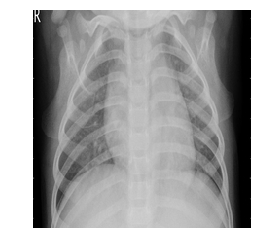

NORMAL/NORMAL2-IM-0221-0001_resized.jpeg
0.9997904896736145


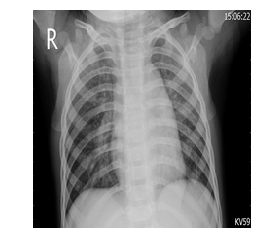

NORMAL/NORMAL2-IM-0222-0001_resized.jpeg
0.9999707937240601


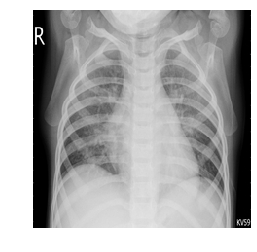

NORMAL/NORMAL2-IM-0232-0001_resized.jpeg
0.9999395608901978


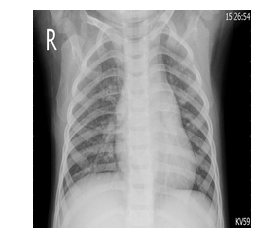

NORMAL/NORMAL2-IM-0233-0001_resized.jpeg
0.9980217218399048


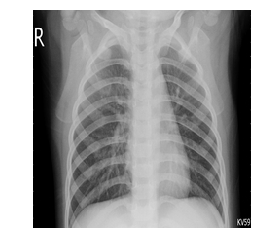

NORMAL/NORMAL2-IM-0237-0001_resized.jpeg
0.9999572038650513


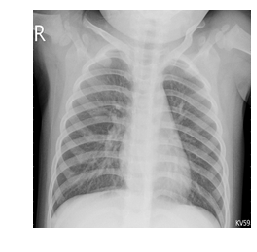

NORMAL/NORMAL2-IM-0246-0001_resized.jpeg
0.9999628067016602


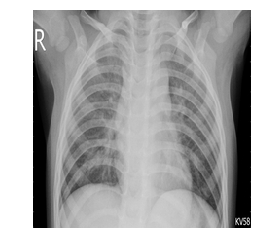

NORMAL/NORMAL2-IM-0252-0001_resized.jpeg
0.9997443556785583


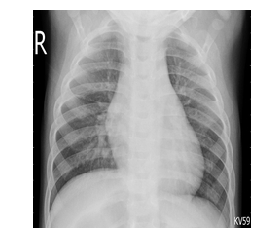

NORMAL/NORMAL2-IM-0256-0001_resized.jpeg
0.9999957084655762


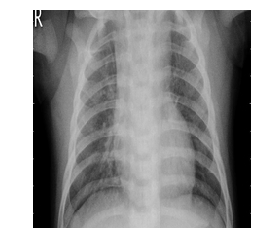

PNEUMONIA/person118_bacteria_560_resized.jpeg
0.9699518084526062


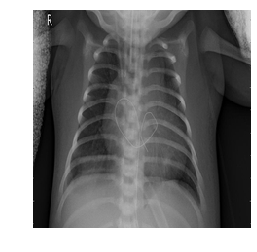

PNEUMONIA/person153_bacteria_726_resized.jpeg
0.008445278741419315


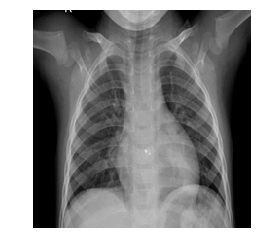

PNEUMONIA/person154_bacteria_728_resized.jpeg
0.00014726990775670856


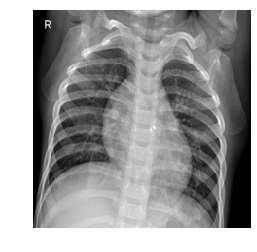

PNEUMONIA/person16_virus_47_resized.jpeg
0.5357664227485657


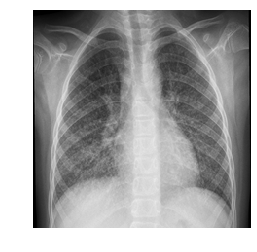

PNEUMONIA/person21_virus_53_resized.jpeg
0.9606462717056274


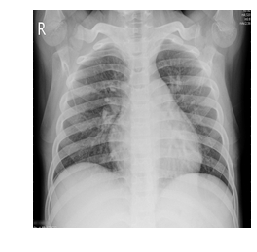

PNEUMONIA/person88_bacteria_439_resized.jpeg
0.2369876503944397


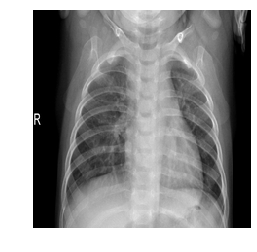

In [51]:
misclassified_filenames = np.array(test_generator.filenames)[test_trues != test_preds]
misclassified_proba_preds = test_probas[test_trues != test_preds]
misclassified_inputs = {filename: float(proba_pred) for filename, proba_pred in
                        zip(misclassified_filenames, misclassified_proba_preds)}
for filename, proba_pred in misclassified_inputs.items():
    print(filename)
    print(proba_pred)
    plt.axis("off")
    plt.imshow(Image.open(os.path.join(test_generator.directory, filename)))
    plt.show()

In [9]:
K.clear_session()